<a href="https://colab.research.google.com/github/Chebem/Audio_Processing/blob/main/P09_Real_Project__Data__Processing_for_training_speech_recogniiton_models__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparing Data for Training a Speech Recognition Model


## Voice Recognition Model


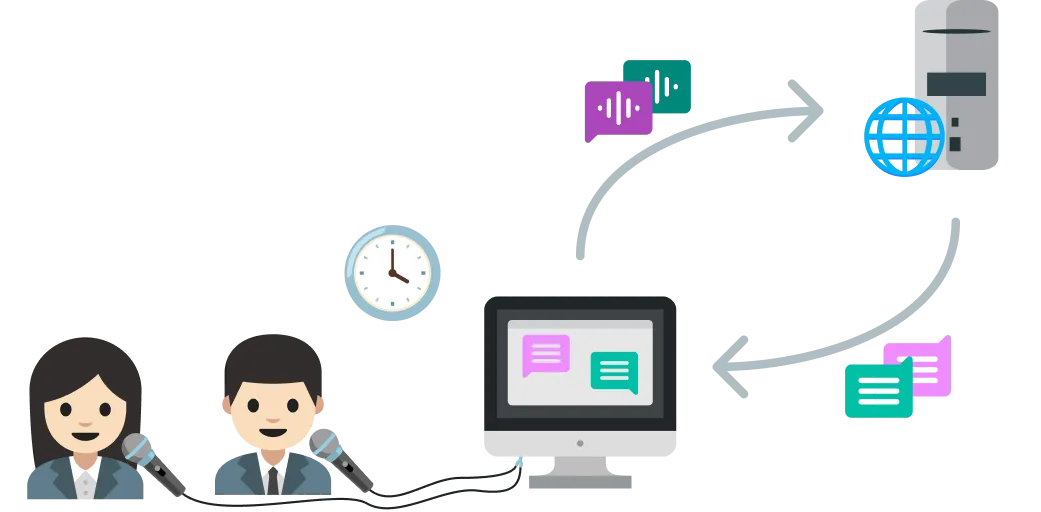

### Understanding Speech Recognition Model Architecture and Training Methods

* A speech recognition model converts human voice input into corresponding text.
* Recently, **deep learning** techniques have become dominant, leading to various model architectures.

---

#### 📌 Basic Speech Recognition Pipeline

* **1. Audio Acquisition**
  - Speech data is collected through microphones, phone calls, etc.
  - Commonly recorded at 8kHz to 16kHz sampling rate.

* **2. Preprocessing**
  - Background noise removal, volume normalization, silence trimming.
  - Standardize sampling rate (e.g., 16kHz).

* **3. Feature Extraction**
  - Extract features like MFCC, Mel-spectrogram, or spectrogram from the audio.
  - Some models take raw waveforms as input (e.g., Wav2Vec).

* **4. Model (Encoder + Decoder)**
  - **Encoder**: Learns temporal/frequency patterns from audio features (RNN, CNN, Transformer, etc.).
  - **Decoder**: Generates final text from encoder outputs using CTC, Attention, or Transducer mechanisms.

* **5. Post-processing**
  - Integrate a **language model (LM)** to improve context and grammar.
  - Apply spelling correction, punctuation insertion, etc.

---

#### 🧠 Speech Recognition Training Techniques

* **CTC (Connectionist Temporal Classification)**
  - Effective when input and output sequence lengths differ.
  - Does not require explicit alignment between speech and text.

* **Attention Mechanism**
  - Used in encoder-decoder models to focus on relevant parts at each decoding step.
  - Widely applied in NLP tasks like translation and summarization.

* **RNN-Transducer**
  - Designed specifically for speech recognition.
  - Supports real-time streaming inference with more expressive decoding than CTC.

* **Self-supervised Learning**
  - Pretrain on large amounts of unlabeled audio to learn representations.
  - Fine-tune on a small labeled dataset, reducing the need for costly annotations.

### Comparison of Deep Learning Speech Recognition Models

* Popular speech recognition models include DeepSpeech, Wav2Vec 2.0, Conformer, Whisper, and more.
* Each model has a different internal structure and processing method, resulting in various strengths and weaknesses.

| **Model**         | **Architecture & Features**                                                                                               | **Advantages**                                                                                     | **Disadvantages**                                                                                                  |
|-------------------|---------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| **DeepSpeech**    | - Proposed by Baidu  \n- CNN + RNN structure (RNN with LSTM or GRU)  \n- Uses CTC loss                                    | - Relatively simple architecture for easy training and implementation  \n- Low hardware requirements | - Vulnerable to noise and speech variation  \n- Lower accuracy compared to modern Transformer-based models          |
| **Wav2Vec 2.0**   | - Proposed by Facebook AI Research (FAIR)  \n- Transformer-based encoder  \n- Self-supervised learning from unlabeled audio | - High accuracy even with limited labels  \n- Directly processes raw audio waveform                 | - Complex model structure increases training/inference cost  \n- Fine-tuning requires time and resources            |
| **Conformer**     | - Proposed by Google  \n- Combines Convolution + Transformer  \n- Optimized for sequential audio data                     | - Learns both local (CNN) and global (Transformer) features  \n- One of the top-performing models   | - Highly computationally intensive  \n- Difficult to implement and optimize                                         |
| **Whisper**       | - Proposed by OpenAI  \n- Transformer-based encoder-decoder  \n- High performance even in multilingual/noisy settings     | - Trained on large-scale speech data  \n- Supports **multilingual recognition & translation**  \n- Suitable for subtitling and other tasks | - Large model size requires powerful hardware  \n- Fine-tuning for domain adaptation can be costly and complex      |

### Comparison of Pre-trained vs. Custom-trained Speech Models

#### Pre-trained Models
* Models that have already been trained on **large-scale public datasets** (e.g., from Hugging Face, NVIDIA NeMo, etc.)

**Advantages**
- **Faster development**: Model architecture and weights are already available
- **Works with limited data**: Can be **fine-tuned** with small domain-specific datasets
- **Easier to reproduce high-performance models**

**Disadvantages**
- May not be **fully optimized for specific domains**
- **Slower inference** due to large model size
- **Limited flexibility** to modify internal architecture

---

#### Custom-trained Models
* Models that are **built and trained from scratch**, including architecture design

**Advantages**
- Can be **fully optimized for a specific domain** (e.g., medical, finance, call centers)
- **Flexible architecture** customization and improvement
- Allows fine-grained **control over data handling and parameter tuning**

**Disadvantages**
- Requires **large volumes of training data**
- **High resource cost** (time, infrastructure, skilled developers)
- **Longer validation and debugging cycles**

### Data Processing by Speech Recognition Model

* Each speech recognition model has different requirements for **preprocessing** and **feature extraction**, depending on its internal architecture.
* It is crucial to ensure that **audio data (speech files)** and **text data (transcriptions)** are **accurately aligned** during training.

#### Key Considerations:
- **Preprocessing Variability**:
  - Models like Wav2Vec2 take raw audio directly, requiring minimal preprocessing.
  - Others (e.g., DeepSpeech, Conformer) require feature extraction like MFCC or Mel-spectrogram.

- **Feature Extraction**:
  - Common features: MFCC, Spectrogram, Mel-spectrogram
  - Some models use **learned features** via self-supervised learning instead of handcrafted ones.

- **Alignment**:
  - Audio and text must be matched in time and content.
  - Forced alignment tools (e.g., MFA, Gentle) are useful when timestamps are required.

- **Data Format**:
  - Consistent sample rates (typically 16 kHz or 8 kHz)
  - Normalized volume and noise-reduced audio
  - Text should be cleaned (no special characters unless needed), lowercase, and punctuation-consistent

#### DeepSpeech Model

* Requires **standardized sampling rate** (typically 16kHz), **noise removal**, and **silence trimming** as basic preprocessing steps.
* Utilizes **classical audio features** such as **MFCC** and **spectrograms** for input representation.
* Uses **CTC (Connectionist Temporal Classification)** architecture, which means **detailed alignment between audio and text is not required**.
  - However, **high-quality transcription labels are crucial** for effective training and accurate results.

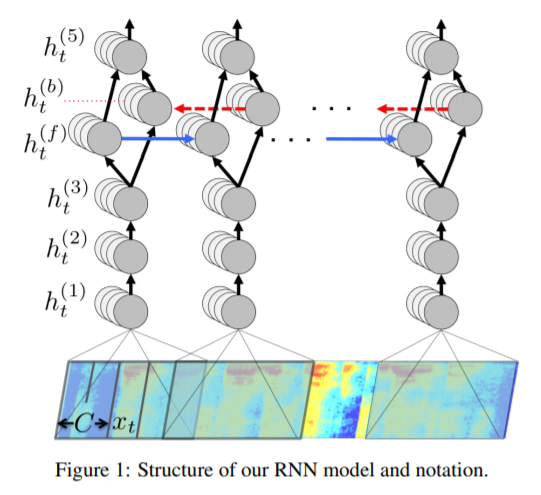

#### Wav2Vec Model

* Takes **raw audio waveform** as input — **no need for spectrogram or MFCC transformation**.
* Only **consistent sampling rate** is required (e.g., 16kHz).
* Leverages **self-supervised learning** to pre-train on **large-scale unlabeled audio data**.
* A **Transformer encoder** inside the model automatically extracts features, **minimizing manual feature engineering**.
* Can be **fine-tuned with a small amount of labeled data**.
* Requires **accurate alignment between audio and text**, so **precise transcription is critical**.

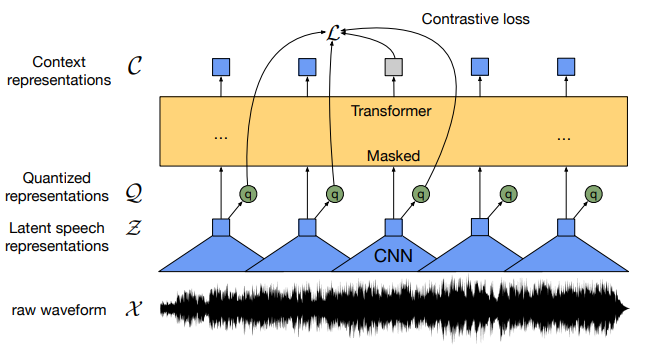

#### Conformer Model

* Combines **CNN and Transformer architecture**, using **Mel-spectrogram or regular spectrogram** as input.
* In noisy environments, apply **noise reduction** carefully to avoid information loss.
* Designed to efficiently learn features along **both time and frequency axes**.
* Using **Mel-spectrogram** enables learning of both **local (CNN)** and **global (Transformer)** characteristics.
* When using an **Attention decoder**, **precise time alignment** significantly affects performance.
* Can support **online/streaming inference** if implemented with a **Transducer structure**.

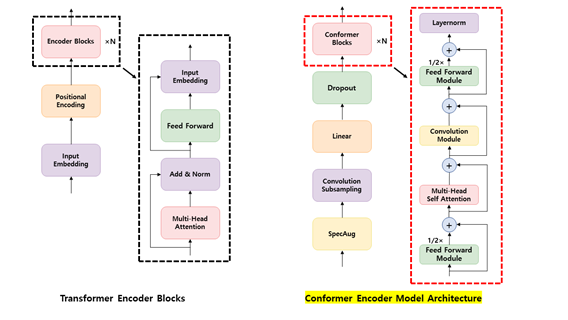

#### Whisper Model

* Whisper, released by OpenAI, is **pretrained on multilingual data and a wide range of recording environments** (e.g., noise, low-quality audio).
* Available in multiple sizes (Tiny ~ Large) — choose based on **real-time requirements, accuracy, and hardware constraints**.
* **16kHz sampling rate is recommended**; only basic preprocessing like **noise removal and volume normalization** is typically needed.
* Uses a **Transformer encoder-decoder** structure to directly process raw audio — **no need to extract MFCC or spectrogram manually**.
* Learns **multi-scale features** directly from the waveform input.
* For better performance, **split long audio segments** using **VAD (Voice Activity Detection)** before input.
* Supports **multiple tasks**: speech-to-text, translation, subtitle generation, etc.
* For domain adaptation (e.g., call centers), **fine-tune the pre-trained model** using **transcripts from the target domain**.
* Given its large-scale pretraining, it can adapt well to **noisy telephony, domain-specific terminology, and internal jargon** — but **fine-tuning requires substantial data and time**.
* To address **OOV (Out-of-Vocabulary) issues**, it's important to **continuously collect and label domain-specific data** for incremental model updates.

## Domain-Specific Model Design and Architecture

* General **ASR (Automatic Speech Recognition)** models are trained to handle a wide range of conditions — **multilingual data, noise, varied speaking styles**, etc.
* For applications in specific industries (e.g., **medical, finance, call centers**), a **custom domain-specific model** is often required.

### 1. Define the Domain and Scope
- Identify domain-specific **terminologies, expressions, and contextual language**.
- Examples:
  - **Medical**: abbreviations, diagnosis names.
  - **Call Centers**: scripted dialogue, product names.

### 2. Analyze Data Characteristics
- Collect and organize **audio recordings and corresponding transcripts** tailored to the domain.
- Examine:
  - Types of **noise** (e.g., telephone line noise, background chatter).
  - Variability in **intonation and speech speed**.
- Develop **preprocessing strategies** accordingly.

### 3. Choose and Customize Model Architecture
- Base the system on proven models: **DeepSpeech, Wav2Vec, Conformer, Whisper**, etc.
- Decide which **decoding approach** best fits the domain:
  - **CTC (Connectionist Temporal Classification)**: good for unaligned sequences.
  - **Attention Mechanism**: ideal for structured transcription with context.
  - **RNN-Transducer**: suitable for real-time streaming ASR.

### 4. Extend and Modularize the Model
- Integrate:
  - Custom **lexicons** (domain vocabulary).
  - **Language models** fine-tuned on in-domain text.
  - **Pronunciation dictionaries** (for rare or technical terms).
- If needed:
  - Apply **model compression** or **quantization**.
  - Explore **streaming-capable architectures** like RNN-T for real-time applications.

### Transfer Learning Using Pre-trained Models

* **Transfer Learning** refers to taking a **pre-trained model**, typically trained on a large and general dataset, and **fine-tuning** it using **a small amount of domain-specific data**.
  - Achieves **high performance** even without a massive labeled dataset
  - Saves **training time and cost**
  - Since pre-trained models are often large, **inference may require more computational resources**
  - If the domain is very different from the pre-training data, fine-tuning may have **limited effectiveness**

---

#### 📌 Transfer Learning Workflow

1. **Select a Pre-trained Model**
   - Choose a model like **Wav2Vec**, **Whisper**, or **HuBERT**
   - Prefer **Self-supervised Learning (SSL)** based models
   - Use publicly available checkpoints (e.g., from Hugging Face, OpenAI)

2. **Prepare Your Data**
   - Collect **paired audio-text data** that includes key **domain-specific terms and expressions**
   - Prioritize samples that represent required pronunciations or speaking styles

3. **Fine-tuning**
   - Train either the **entire model** or **specific layers**
   - Tune hyperparameters like **learning rate** and **batch size** for optimal performance

4. **Validation & Evaluation**
   - Evaluate using **domain-specific metrics** such as:
     - Recognition accuracy of **technical terms**
     - **Precision**, **Recall**, and other quality metrics
   - Compare performance on **in-domain** data versus **general speech data**

### Exploring Data Application Methods for Model Training

1. **Collect Original Audio Data**
   - Include **natural conversations** within the target domain
   - Ensure diversity across:
     - **Speakers**: gender (male/female), age groups, accents
     - **Speaking conditions**: telephone-quality audio, on-site recordings, etc.

2. **Preprocessing**
   - **Resample** audio to a consistent rate (commonly **16kHz**)
   - Apply **noise reduction** and **volume normalization**
   - Use **Voice Activity Detection (VAD)** to split long recordings into **utterance-level segments**

3. **Transcription Quality Control**
   - Ensure transcriptions are **accurate and consistent**
     - Define **rules for spelling and formatting domain-specific terms**
   - Verify that **pronunciation, intonation, and colloquial expressions** are correctly captured and reflected

#### 🔄 Data Application Methods

* **Full Training**
  - Used when a **large amount of domain-specific audio and text data** is available
  - Train the model from scratch by **defining a custom architecture**
  - Offers **the highest domain optimization**, but requires **significant time and computational cost**

* **Fine-tuning**
  - Start from a **pre-trained model** and **continue training with domain-specific data**
  - Ideal when data is **limited**
  - **Efficient** and **quick** way to boost performance within the target domain

* **Feature Extraction-Based Training**
  - Freeze the **early layers** of a pre-trained model (typically the encoder)
  - Retrain only the **later layers (e.g., decoder or classification head)**
  - Maintains shared **acoustic features**, while optimizing only the output for domain-specific performance

## Comparing Evaluation Methods for Speech Recognition Model Performance

* To **objectively evaluate** the performance of a speech recognition model, it's essential to consider **multiple metrics and testing scenarios**.
* Evaluation should reflect **real-world usage conditions**, especially for domain-specific applications (e.g., call centers, medical records).

### Key Evaluation Aspects

- **Accuracy Metrics**:
  - **WER (Word Error Rate)**: Measures the rate of word-level mismatches.
  - **CER (Character Error Rate)**: More sensitive, especially for short utterances or non-space-delimited languages (e.g., Korean, Chinese).
  
- **Domain Relevance**:
  - Evaluate whether **domain-specific terms** (e.g., product names, medical terms) are correctly recognized.
  
- **Noise Robustness**:
  - Test model performance under **various noise levels and environments** (clean, telephone-quality, background noise).

- **Speaker Diversity**:
  - Include data from **different genders, ages, accents** to ensure robustness.

- **Latency and Inference Speed**:
  - Critical for **real-time systems** like call centers or voice assistants.

- **Subjective Evaluation** (if applicable):
  - Human reviewers check **readability**, **fluency**, and **naturalness** of the transcribed text.

> Using a **combination** of quantitative metrics and domain-specific evaluation ensures a more **comprehensive assessment** of your speech recognition system.

### Evaluation Metrics

* Variables
  * $S$: Substitutions (number of replaced words/characters)
  * $D$: Deletions (number of deletions)
  * $I$: Insertions (number of insertions)
  * $N$: Total number of words
  * $M$: Total number of characters (or syllables)
  * $X$: Number of completely incorrect sentences
  * $T$: Total number of sentences

---

* **WER (Word Error Rate)**
$$ \text{WER} = \frac{S + D + I}{N} $$
  - Most commonly used metric in speech recognition.
  - Measures the error rate at the **word (or token)** level.

* **CER (Character Error Rate)**
$$ \text{CER} = \frac{S + D + I}{M} $$
  - Used for languages like **Korean or Chinese** where characters/syllables are key.
  - Measures the error rate at the **character or syllable** level.

* **SER (Sentence Error Rate)**
$$ \text{SER} = \frac{X}{T} $$
  - Evaluates **whole sentence accuracy**.
  - Useful in contexts like **call center transcripts**, where sentence-level meaning matters.

* **RTF (Real-Time Factor)**
$$ \text{RTF} = \frac{T_p}{T_a} $$
  - $T_p$: Time taken to process audio by the model  
  - $T_a$: Actual duration of the audio
  - If **RTF < 1**, the model can process faster than real-time  
    (e.g., RTF = 0.5 → a 10-second audio takes 5 seconds to process)

---
These metrics are critical for evaluating both **accuracy and practicality** of speech recognition systems.

### Domain-Specific Evaluation Methods

* **Recognition Accuracy for Specialized Terms**
  - Evaluate how accurately the model recognizes **domain-specific keywords** such as:
    - Technical jargon
    - Product names
    - Abbreviations
  - Use a **custom dictionary** to track **word-level recognition accuracy** for these key terms separately.

* **Priority Sentences**
  - Check if **critical service phrases** (e.g., “The monthly fee is 20,000 KRW”) are **accurately recognized**.
  - These sentences often affect **user satisfaction** or **contractual understanding** in domains like customer service.

* **Noise Robustness & Real-Time Capability**
  - Evaluate performance (e.g., WER, CER) on **high-noise recordings** from environments such as:
    - Phone lines
    - Retail spaces
    - Public areas
  - Measure **latency** to assess how well the model can perform in **real-time scenarios**, which is crucial for live deployments.

---
These tailored evaluation methods ensure your ASR system is **aligned with real-world domain needs**, not just generic benchmarks.

### Evaluation Scenarios by Model Type

* **DeepSpeech**
  - Relatively lightweight model architecture.
  - Focus evaluation on **WER (Word Error Rate)** under clean conditions.
  - Test for **accuracy degradation** in noisy environments or **accented speech** scenarios.

* **Wav2Vec / Whisper / Conformer**
  - These are **large-scale models**, requiring broader evaluation metrics:
    - **WER / CER** (Word/Character Error Rate)
    - **RTF (Real-Time Factor)** to measure inference latency
    - **Memory usage** during inference
  - Assess performance **before and after fine-tuning** with **domain-specific noisy data**.

* **Domain-Specific Custom Models**
  - Focus on **specialized vocabulary and sentence structures** instead of generic sentences.
  - Construct **custom evaluation sets** with:
    - Domain jargon (e.g., legal, medical, customer support)
    - **Intent-level accuracy** (e.g., complaints, requests, commands)
  - Analyze **recognition rate by intent type** to improve real-world usability.

## 모델 성능을 향상시키기 위한 음성 특징 추출 및 방법 비교

## Comparison of Speech Feature Extraction Methods

| **Feature Extraction Method**                     | **Concept/Process**                                                                                                                                          | **Advantages**                                                                                                                                                                                                                                 | **Disadvantages**                                                                                                                                                                                                                           |
|---------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **MFCC** <br>(Mel-Frequency Cepstral Coefficients) | - Splits original audio into **Mel-frequency bands**, applies log, then **Inverse Fourier Transform (DCT)** to get final coefficients<br>- Mimics human auditory perception; uses compact cepstral features | - Widely used traditional method<br>- Reduces dimensionality (lower input size)<br>- Low complexity, suitable for real-time systems                                                                                                            | - May lose detailed spectral information due to dimensionality reduction<br>- Requires extra denoising in noisy environments<br>- May not capture rich features needed by deep learning models                                               |
| **Mel-spectrogram** <br>(FBank: Filter Bank)       | - Splits audio into frames, applies **Mel filter bank** to compute filter energies<br>- Preserves 2D time-frequency representation                             | - Reflects human auditory scale<br>- Preserves more detail than MFCC<br>- Ideal for **image-based models** (CNNs, Conformers)                                                                                                                  | - Higher dimensionality than MFCC; more compute-intensive<br>- Sensitive to noise if post-processing (e.g., log scaling, normalization) is done poorly                                               |
| **Spectrogram**                                    | - Uses **STFT (Short-Time Fourier Transform)** to produce a time-frequency 2D representation<br>- No Mel filter applied                                        | - Most **intuitive** and **information-rich** view<br>- Compatible with arbitrary CNNs and vision transformers<br>- Widely used in **TTS, acoustic event detection, sound classification**                 | - Very high dimensionality leads to high computation cost<br>- Not frequency-efficient for voice-only focus—may waste resources on irrelevant bands                                                  |
| **Raw waveform** <br>(Direct Input)                | - Directly feeds **raw audio waveform** into deep models (CNN, Transformer)<br>- Model **learns optimal features automatically** (e.g., in Wav2Vec, Whisper) | - No need for handcrafted features<br>- High accuracy with enough data<br>- Perfect fit for **self-supervised models** (e.g., Wav2Vec 2.0, Whisper)                                                      | - Requires **large datasets** and compute resources<br>- Complex architecture and long training/inference times<br>- Needs careful data preparation in noisy conditions                              |

---

### Summary of Common Feature Types

- **MFCC**
  - Uses DCT to concentrate energy across fewer dimensions.
  - Compact, classical method often used with HMM-GMM.

- **Mel-spectrogram**
  - Highlights mid-high frequencies important to human hearing.
  - 2D image-like input works well with CNN-based deep learning.

- **Spectrogram**
  - Full STFT output; most detailed time-frequency map.
  - Preferred in high-performance audio analysis (e.g., Conformer models).

- **Raw waveform**
  - End-to-end processing with no hand-crafted preprocessing.
  - Enabled by self-supervised learning; requires more data but yields best generalization.

### 📁 Load Dataset (Google Drive Integration)

To use a dataset stored in your Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🔍 Check File Paths from Google Drive

In [ ]:
!ls '/content/drive/MyDrive/Low-quality Phone voice sample'

asr.json  eval.csv  train.csv  라벨링데이터  원천데이터


### Voice File Test and Confirmation

In [ ]:
wav_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/원천데이터/TS_D03/D03/J13'
txt_dir = '/content/drive/MyDrive/Low-quality Phone voice sample/라벨링데이터/TL_D03/D03/J13'

In [ ]:
import librosa
from IPython.display import Audio, display

# Define file paths
text_file = txt_dir + '/S000002/0002.txt'
audio_file = wav_dir + '/S000002/0002.wav'

# Read and display transcript
with open(text_file, 'r', encoding='utf-8') as file:
    content = file.read()
    print("Transcript:")
    print(content)

# Load and play audio
audio_data, sr = librosa.load(audio_file, sr=None)
display(Audio(data=audio_data, rate=sr))

Transcript:
네 그 교육 신청을 하려고 했는데.


### 원시 파형 (Waveform)

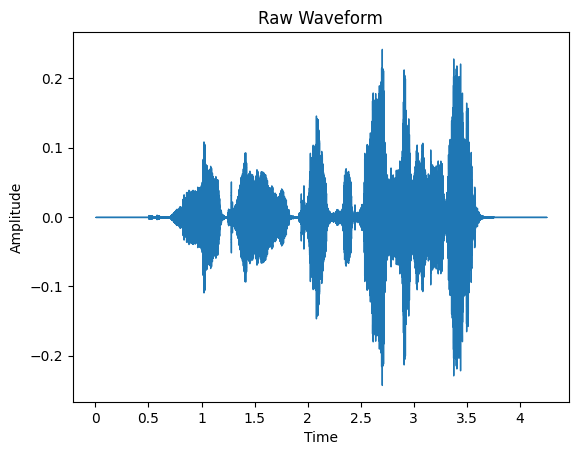

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
librosa.display.waveshow(audio_data, sr=sr)
plt.title("Raw Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### MFCC (Mel-Frequency Cepstral Coefficients)

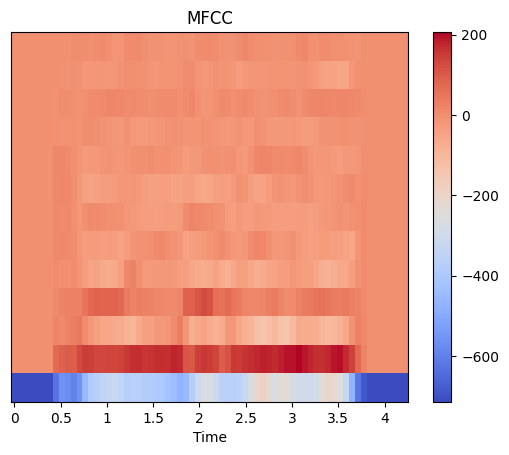

In [ ]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
plt.figure()
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.title("MFCC")
plt.colorbar()
plt.show()

### Mel-spectrogram (Filter Bank)

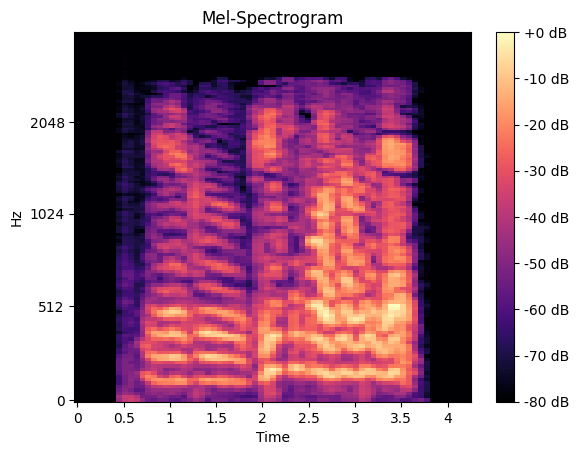

In [ ]:
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
plt.figure()
librosa.display.specshow(mel_spec_dB, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

### Spectrogram (STFT)

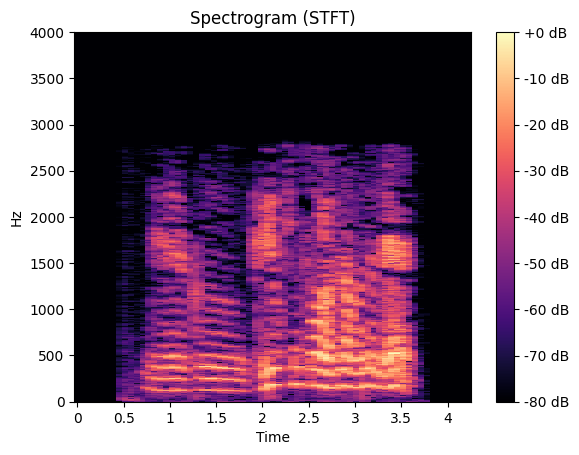

In [ ]:
stft_data = librosa.stft(audio_data)
stft_dB = librosa.amplitude_to_db(np.abs(stft_data), ref=np.max)
plt.figure()
librosa.display.specshow(stft_dB, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectrogram (STFT)")
plt.colorbar(format='%+2.0f dB')
plt.show()

## Choosing a Feature Extraction Method

* **Dataset and Resource Size**
  * If resources are limited and real-time processing (low latency) is required, **MFCC (low-dimensional features)** may be more advantageous.
  * If sufficient GPU and large-scale data are available, using **Mel-spectrogram or Spectrogram directly as input** can maximize deep learning performance.

* **Model Architecture**
  * CNN-based models often prefer 2D spectral inputs, and Transformer-based models are also well-suited for 2D spectrum or raw waveform processing.
  * If you prefer an **end-to-end structure**, consider **raw waveform input models** like Wav2Vec or Whisper.

* **Deployment Environment**
  * In real-time systems like call centers, in-car assistants, or IoT devices, you need to balance **preprocessing complexity and inference speed**.
  * In noisy environments, decide whether to **apply filtering during feature extraction** (e.g., MFCC, FBank) or let the **model learn features on its own**.

---

* Traditional ASR pipelines often use **MFCC or Mel-spectrogram** combined with **CTC-based models** like DeepSpeech.
* Recent **end-to-end models (e.g., Wav2Vec, Whisper, Conformer)** tend to use **raw waveform** or **Mel-spectrogram** inputs, minimizing preprocessing and retaining detailed information.

### Pre-extracting Features and Saving for Training

- Convert all audio data into **MFCC** or **Mel-spectrogram**, and save the features as **.npy**, **.hdf5**, or **.pt** files on disk.
- During training, load these pre-extracted features and feed them directly into the model.

#### Advantages
- **Faster training** since you don’t need to convert audio to spectrogram at every epoch.
- As the feature files are fixed, the model **receives the same input data consistently**, improving **reproducibility and debugging**.
- When performing **multiple experiments** (e.g., changing hyperparameters or model structure), you don’t need to re-extract features each time — boosting **development efficiency**.

#### Disadvantages
- Requires **double storage** for both raw audio and extracted features — which can be a burden for large datasets.
- If you **change preprocessing parameters** (e.g., window size, number of Mel filters), you'll need to **re-extract all features**.
- For **real-time augmentation** (e.g., noise injection, speed changes), you must convert from raw waveform each time — so precomputed features **lack flexibility**.

### On-the-fly Feature Extraction During Training

- Keep the raw waveform files (e.g., `.wav`) as-is, and perform **spectrogram conversion per batch** during training via `DataLoader` or the training loop.
- Use libraries such as **Librosa** or **torchaudio** to convert audio to features **in real-time** or **per batch**, then pass to the model.

#### Advantages
- Enables **flexible data augmentation** like pitch shifting, noise injection, or time-stretching at the audio level, since spectrograms are freshly generated each time.
- You can easily **change STFT parameters** (e.g., window size, hop length) or the number of Mel filters to **re-extract features from the same raw audio** without re-saving files.
- Offers **scalability to End-to-End models** (like Wav2Vec or Whisper) that process raw waveforms directly.

#### Disadvantages
- Since **STFT or Mel conversion is performed during training**, **training time increases**, especially with large datasets or many epochs — slower than pre-extracted features.
- **Augmentations or randomness** in on-the-fly conversion can lead to **inconsistent inputs across runs**, making debugging harder (though this can be managed by setting random seeds).
- Performing STFT or Mel filterbanks on the GPU **increases memory and compute overhead**.

### Guide to Choosing Feature Extraction Strategy in Real Projects

- **Data Scale**
  - If you have **thousands to tens of thousands of hours of audio**, **on-the-fly conversion can be extremely time-consuming**, so **pre-extracted features are more common in practical workflows**.

- **Augmentation Strategy**
  - If you want to try **various types of audio augmentation**, **on-the-fly extraction is better** since it works directly with the original waveform.
  - However, you can also apply **post-processing augmentations (like SpecAugment)** on pre-extracted spectrograms.

- **Model Structure and Objective**
  - If you are using **End-to-End models** such as **Wav2Vec, Whisper, or Conformer**, they usually **perform internal feature extraction** via STFT or convolution layers.
  - In this case, **manual preprocessing like MFCC is often unnecessary**.

- **Development/Experimentation vs. Deployment/Real-time**
  - During research or prototyping, it's important to **balance fast experimentation (pre-extracted)** with **flexible augmentation (on-the-fly)**.
  - In **deployment or real-time environments**, **real-time feature extraction or using End-to-End models** is more common, as **on-the-fly processing is required**.